# **掛載雲端硬碟**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **安裝相關套件**

In [ ]:
#remove " > /dev/null 2>&1" to see what is going on under the hood
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

In [ ]:
!pip install stable_baselines3 gym box2d-py tensorflow-gpu

**Import Open AI GYM的2D box** **並選用Cart Pole進行遊戲訓練** 

 Imports and Helper functions


In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

In [ ]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""
game = "CartPole-v1" 
def show_video(): # 將video在網頁上展示
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True) # 以monitor函數監控訓練結果
  return env

# **Cart Pole**!

In [ ]:
#env = wrap_env(gym.make("MsPacman-v0"))
env = wrap_env(gym.make(game))

In [ ]:
#check out the pacman action space!
print(env.action_space)

### **測試環境**

In [ ]:
observation = env.reset() # 以隨機策略測試環境,並將reward印出來
reward = 0
while True:
  
    env.render()
    
    #your agent goes here
    action = env.action_space.sample() 
         
    observation, rewards, done, info = env.step(action) 
    reward += rewards
        
    if done: 
      break;

print(reward)  
env.close()
show_video()

# **訓練**

以PPO做為環境model進行訓練

In [ ]:
# env = wrap_env(gym.make(game)) 
# env = DummyVecEnv([lambda: env])
# model = PPO('MlpPolicy', env, verbose = 1)

In [ ]:
model.learn(total_timesteps=50000) # 設定max_timesteps為50000

In [ ]:
#evaluate_policy(model, env, n_eval_episodes=10, render=True)
#env.close()
env.close()

# **儲存模型**

In [ ]:
model.save("/content/drive/MyDrive/deep reinforcement learning/colab/PPO_model") # 將模型存儲於對應雲端硬碟路徑

In [ ]:
del model

# **測試**

In [ ]:
model = PPO.load("/content/drive/MyDrive/deep reinforcement learning/colab/PPO_model", env=env) #需更改雲端硬碟路徑

In [ ]:
#env.close()
env = wrap_env(gym.make(game))
obs = env.reset()
done = False
reward = 0
while not done: # 測試訓練後的結果
    action, _states = model.predict(obs.copy())
    obs, rewards, done, info = env.step(action)
    reward+=rewards
    env.render()
    
    #print(info)
print(reward)

env.close()


In [ ]:
show_video()

# 訓練前的reward: 38

# 以max_timesteps訓練後的reward: 500

# (Baseline需大於475)

# Action Space:

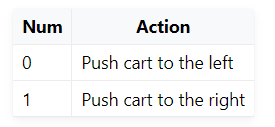

# Rewards

Since the goal is to keep the pole upright for as long as possible, a reward of +1 for every step taken, including the termination step, is allotted. The threshold for rewards is **475** for v1.